# Metal Surface Defects

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Path to the 'train' directory where images are stored
train_dir = 'metal_surface_defects/NEU Metal Surface Defects Data/train'

# Initialize lists to hold image data and labels
image_data = []
labels = []

# Function to load and label images
def load_image_data(train_dir):
    for defect_type in os.listdir(train_dir):
        defect_folder = os.path.join(train_dir, defect_type)
        
        if os.path.isdir(defect_folder):  # Check if it's a folder (defect type)
            for file_name in os.listdir(defect_folder):
                if file_name.endswith('.bmp'):  # Assuming BMP files are used
                    # Load the image
                    img = cv2.imread(os.path.join(defect_folder, file_name))
                    img = cv2.resize(img, (224, 224))  # Resize to consistent dimensions
                    image_data.append(img)
                    
                    # The folder name is the label (defect type)
                    labels.append(defect_type)
    
    return np.array(image_data), labels

# Load the image data and labels
X_data, y_labels = load_image_data(train_dir)

# Normalize image data (pixel values to [0, 1])
X_data = X_data / 255.0

# Encode the labels (defect types) as numeric values
label_encoder = LabelEncoder()
y_labels_encoded = label_encoder.fit_transform(y_labels)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_labels_encoded, test_size=0.2, random_state=42)

# Print the shape of the resulting data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (1324, 224, 224, 3)
Test data shape: (332, 224, 224, 3)


In [3]:
# Train a Machine Learning Model (RandomForest)

# Flatten the images for use in machine learning models
X_train_flattened = X_train.reshape(X_train.shape[0], -1)  # Flatten images to 1D
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_flattened, y_train)

# Predict on the test set
y_pred = model.predict(X_test_flattened)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_rep)

Files in the 'train' directory: ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']


In [5]:
# Use Convolutional Neural Networks (CNN)

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Number of classes for output
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


C:\Users\milto\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 28s 645ms/step - accuracy: 0.2227 - loss: 3.6255 - val_accuracy: 0.2289 - val_loss: 1.6676
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 23s 552ms/step - accuracy: 0.3674 - loss: 1.5097 - val_accuracy: 0.4729 - val_loss: 1.2819
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 23s 542ms/step - accuracy: 0.5290 - loss: 1.1459 - val_accuracy: 0.6867 - val_loss: 0.9241
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 25s 592ms/step - accuracy: 0.6960 - loss: 0.8557 - val_accuracy: 0.7410 - val_loss: 0.7658
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 27s 629ms/step - accuracy: 0.7779 - loss: 0.6303 - val_accuracy: 0.7681 - val_loss: 0.6454
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 25s 588ms/step - accuracy: 0.8120 - loss: 0.5187 - val_accuracy: 0.8464 - val_loss: 0.4300
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 25s 584ms/step - accuracy: 0.8446 - loss: 0.4838 - val_accuracy: 0.6717 - val_loss: 0.7053
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 26s 609ms/step - accuracy: 0.8413 - loss: 0.4435 - val_accu

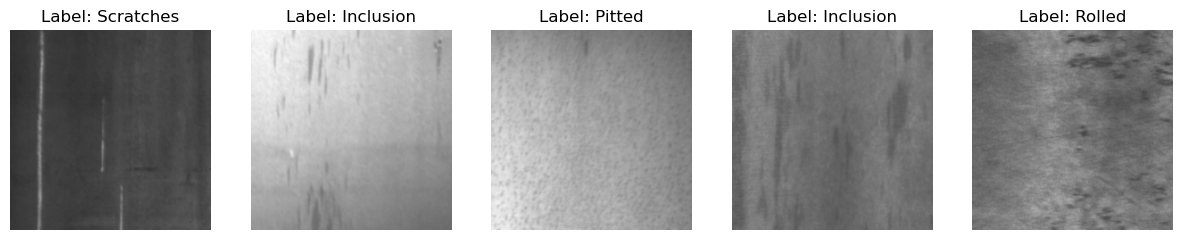

In [6]:
# Visualization

# Visualize a few images from the dataset with their labels
def visualize_images(X, y, labels, num_images=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(X[i])
        plt.title(f"Label: {labels[y[i]]}")
        plt.axis('off')
    plt.show()

# Visualize some sample images from the test set
visualize_images(X_test, y_test, label_encoder.classes_)


In [ ]:
# Model Evaluation and Performance

In [12]:
# Reshape the images for a dense model (fully connected)
X_train_flattened = X_train.reshape(X_train.shape[0], -1)  # Flatten training images
X_test_flattened = X_test.reshape(X_test.shape[0], -1)  # Flatten test images

# Apply SMOTE for balancing the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_flattened, y_train)  # Apply SMOTE to flattened data

# Train the model using flattened and SMOTE balanced image data
model = RandomForestClassifier(random_state=42)  # Using RandomForest as an example, replace with your model

model.fit(X_train_smote, y_train_smote)

# Predict on the flattened test set
y_pred = model.predict(X_test_flattened)

# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.7440

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        60
           1       0.66      0.58      0.62        64
           2       0.96      0.88      0.92        58
           3       0.62      0.77      0.69        39
           4       0.76      0.82      0.79        62
           5       0.68      0.65      0.67        49

    accuracy                           0.74       332
   macro avg       0.74      0.74      0.74       332
weighted avg       0.75      0.74      0.74       332

